# <center> 客户流失预警

## 一、 数据清洗与格式转换

In [1]:
import warnings
warnings.filterwarnings('ignore') #忽视

- Step.1 通过pandas来导入csv：查看一下数据的基本情况，可以看到， 整个数据集有3333条数据， 21个维度， 最后一列是分类

In [2]:
import pandas as pd
import numpy as np
# 加载数据集
churn_df = pd.read_csv('churn.csv')
col_names = churn_df.columns.tolist() #所有的列展示出来

print("Column names:")
print(col_names)


Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


- Step.2 基本信息以及类型

In [3]:
to_show = col_names[:6] + col_names[-6:] #前6列特征和后6列特征

print("\nSample data:")
churn_df[to_show].head(6)


Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,9.18,6.3,6,1.70,0,False.


In [4]:
churn_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [5]:
churn_df.describe() 
#describe() 可以返回具体的结果， 对于每一列。

#数量 平均值 标准差 25% 分位 50% 分位数 75% 分位数 最大值 很多时候你可以得到NA的数量和比例。

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## 二 探索性数据分析

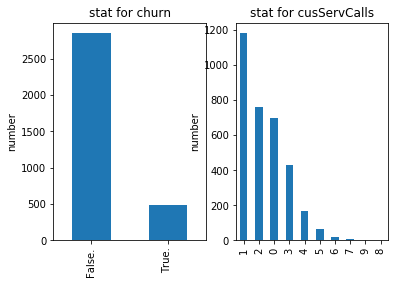

In [6]:
#我们先来看一下流失比例， 以及关于打客户电话的个数分布
import matplotlib.pyplot as plt # 仿真
%matplotlib inline

fig = plt.figure()
fig.set(alpha=0.3)  # 设定图表颜色alpha参数
#subplot2grid(shape , loc )
plt.subplot2grid((1,2),(0,0))# 图像几行几列，从第0行第0列，

# bar:条形直方图
churn_df['Churn?'].value_counts().plot(kind='bar') #把用户是否流失分组起来，流失的有多少人，没有流失的有多少人
plt.title("stat for churn") # 设置标签/label
plt.ylabel("number")  #流失与否的数量，一共3333行，没有流失的约占2700 ，流失的占500左右


plt.subplot2grid((1,2),(0,1))            
churn_df[u'CustServ Calls'].value_counts().plot(kind='bar') # 客服电话， 客户打电话投诉多那流失率可能会大
plt.title("stat for cusServCalls") # 标题
plt.ylabel(u"number") #客户打1个客服电话的有1400个左右，客户.....总计加起来有3333个 

plt.show()

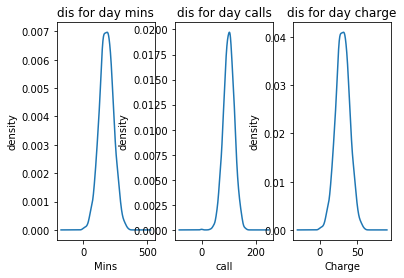

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((1,3),(0,0)) # 在一张大图里分列几个小图
churn_df['Day Mins'].plot(kind='kde') # 白天通话分钟数，图用的kde的图例
plt.xlabel(u"Mins")# 横轴是分钟数
plt.ylabel(u"density")  # density：密度
plt.title(u"dis for day mins") #标题



plt.subplot2grid((1,3),(0,1))            
churn_df['Day Calls'].plot(kind='kde')# 白天打电话个数
plt.xlabel(u"call")# 客户打电话个数
plt.ylabel(u"density") #密度
plt.title(u"dis for day calls") #标题

plt.subplot2grid((1,3),(0,2))           
churn_df['Day Charge'].plot(kind='kde') # 白天收费情况
plt.xlabel(u"Charge")# 横轴是白天收费情况
plt.ylabel(u"density") #密度
plt.title(u"dis for day charge")

plt.show()


<Figure size 432x288 with 0 Axes>

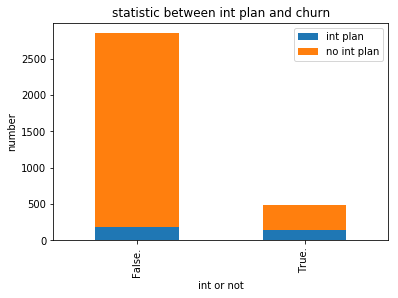

In [8]:
#import matplotlib.pyplot as plt

fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

#查看流失与国际漫游之间的关系
int_yes = churn_df['Churn?'][churn_df['Int\'l Plan'] == 'yes'].value_counts() # 分组，yes:参与了有国际漫游需求的统计出来
int_no = churn_df['Churn?'][churn_df['Int\'l Plan'] == 'no'].value_counts() #分组：no:没有参与国际漫游的统计出来

#用DataFrame做图例上的标签 ，在右上角
df_int=pd.DataFrame({u'int plan':int_yes, u'no int plan':int_no})

df_int.plot(kind='bar', stacked=True)
plt.title(u"statistic between int plan and churn")
plt.xlabel(u"int or not") 
plt.ylabel(u"number")

plt.show()

# 下图中，原始数据有3333行，False：对于没有流失的用户中，有2700个，其中参与了有100个左右，没有参与的2600多个
#True：对于真正流失的用户有400个左右，参与了国际漫游的有100个，没有参与漫游的用300个
#结论：有国际电话的流失比例较高

<Figure size 432x288 with 0 Axes>

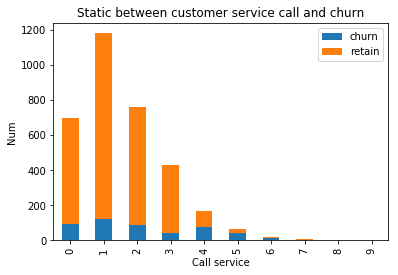

In [9]:
#查看客户服务电话和结果的关联
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

cus_0 = churn_df['CustServ Calls'][churn_df['Churn?'] == 'False.'].value_counts()#没有用户流失的电话数
cus_1 = churn_df['CustServ Calls'][churn_df['Churn?'] == 'True.'].value_counts()#有用户流失的电话数

df=pd.DataFrame({u'churn':cus_1, u'retain':cus_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Static between customer service call and churn")
plt.xlabel(u"Call service") # 打电话的数量
plt.ylabel(u"Num")  #流失与不流失的总数

plt.show()

# 在打3次客服电话的时候有400多人，其中没有流失的有300，流失了有100人
# 在打4次客服电话的时候有180人，其中没有流失的有80人，流失的有100人

## 三 特征筛选

In [10]:
# 对于标签数据需要整合
ds_result = churn_df['Churn?']

#shift+tab:condition是布尔类型的数组，每个条件都和x ,y 对应

#相当于流失了/True为1 ，没有流失/False为0
Y = np.where(ds_result == 'True.',1,0) 
# 哑变量 == 读热编码
dummies_int = pd.get_dummies(churn_df['Int\'l Plan'], prefix='_int\'l Plan') #prefix：前缀
# VMail Plan：某个策划活动  prefix：前缀
dummies_voice = pd.get_dummies(churn_df['VMail Plan'], prefix='VMail')

#concat：用来合并2个或者2个以上的数组
ds_tmp=pd.concat([churn_df, dummies_int, dummies_voice], axis=1)

# 删除州名、地区编号、手机号、用户是否流失、各种策略活动
to_drop = ['State','Area Code','Phone','Churn?', 'Int\'l Plan', 'VMail Plan']
df = ds_tmp.drop(to_drop,axis=1)

print("after convert ")
df.head(5)

after convert 


,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,_int'l Plan_no,_int'l Plan_yes,VMail_no,VMail_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,1,0


## 四 特征工程

In [11]:
#数量级不一样，，通过Scaler实现去量纲的影响
#在训练模型时之前经常要对数据进行数组转化，as_matrix()：把所有的特征都转化为np.float
X = df.as_matrix().astype(np.float)


from sklearn.preprocessing import StandardScaler # 标准化

scaler = StandardScaler()# 标准化

X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features" % X.shape) #  3333行 * 19列
print("---------------------------------")
print("Unique target labels:", np.unique(Y)) # 标签的唯一值
print("---------------------------------")
print(len(Y[Y==0])) # 没丢失的有2850
print("---------------------------------")
print(len(Y[Y==1])) # 丢失的有483

Feature space holds 3333 observations and 19 features
---------------------------------
Unique target labels: [0 1]
---------------------------------
2850
---------------------------------
483


In [12]:
# 整理好的数据拿过来
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)
to_drop = ['State','Area Code','Phone','Churn?']
churn_feat_space = churn_df.drop(to_drop,axis=1)
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'
features = churn_feat_space.columns
X = churn_feat_space.as_matrix().astype(np.float)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features" % X.shape)
print("---------------------------------")
print("Unique target labels:", np.unique(y))
print("---------------------------------")
print(X[0])#第1行
print("---------------------------------")
print(len(y[y == 0]))

Feature space holds 3333 observations and 17 features
---------------------------------
Unique target labels: [0 1]
---------------------------------
[ 0.67648946 -0.32758048  1.6170861   1.23488274  1.56676695  0.47664315
  1.56703625 -0.07060962 -0.05594035 -0.07042665  0.86674322 -0.46549436
  0.86602851 -0.08500823 -0.60119509 -0.0856905  -0.42793202]
---------------------------------
2850


## 五 建立多种基础模型，尝试多种算法

In [13]:
# 手写一个交叉验证：调参
from sklearn.model_selection import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(5,shuffle=True) # 5折
    y_pred = y.copy() #把所有的标签y拿出来备份一下copy()

    # 一共是5份，每四份儿当做训练集 ，剩下的一份验证集
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [14]:
#手写的测试
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true,y_pred):
    
    return np.mean(y_true == y_pred) # 相等为True ，不等为False ，  1+0+1+0.../3333

print("Support vector machines:")
print("%.3f" % accuracy(y, run_cv(X,y,SVC)))
print("----------------------------")
print("LogisticRegression :")
print("%.3f" % accuracy(y, run_cv(X,y,LR)))
print("----------------------------")
print("K-nearest-neighbors:")
print("%.3f" % accuracy(y, run_cv(X,y,KNN)))

Support vector machines:
0.918
----------------------------
LogisticRegression :
0.861
----------------------------
K-nearest-neighbors:
0.897


KNN: 0.894088 (0.009717)
------------------------------
LR: 0.861384 (0.015574)
------------------------------
SVM: 0.919288 (0.011112)
------------------------------


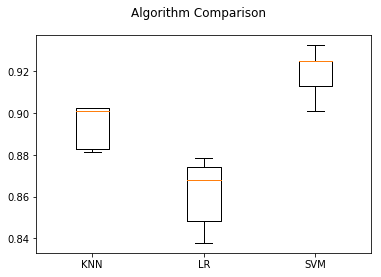

In [15]:
# 调入工具包
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt


# 初始化模型
models = []
models.append(('KNN', KNeighborsClassifier()))


models.append(('LR', LogisticRegression()))

models.append(('SVM', SVC()))

# 初始化
results = []
names = []
scoring = 'accuracy' # 准确率
for name, model in models:
    
    #random_state = 0 
    kfold = KFold(5,shuffle=True,random_state = 0) # 5折
    cv_results = cross_val_score(model, X, Y, cv=kfold)#scoring=scoring 默认为None
    results.append(cv_results)#交叉验证给的结果分
    names.append(name)
    #模型的标准差，体现模型的分值的波动，std越小越稳定
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("------------------------------")
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 总结：SVM的效果比较好

## 六 模型调参/提升模型

In [16]:
from sklearn.ensemble import RandomForestClassifier as RF
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RF(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9537942133750515


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed)

model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.9525966085846325


## 七 评估测试/结论汇报

In [18]:
def run_prob_cv(X, y, clf_class, **kwargs):
    kf = KFold(5,True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        
        y_prob[test_index] = clf.predict_proba(X_test) #返回的是概率值 ，属于0的概率多少，属于1的概率是多少
    return y_prob

In [19]:
import warnings
warnings.filterwarnings('ignore')


pred_prob = run_prob_cv(X, y, RF, n_estimators=10)

pred_churn = pred_prob[:,1]#只要属于1的概率是多少 ，因为咱们关注的是流失的
is_churn = y == 1


counts = pd.value_counts(pred_churn) # 属于1的概率多少进行分组统计 ， 即：pred_prob	count



true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[pred_churn == prob]) 
    true_prob = pd.Series(true_prob)


counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

,pred_prob,count,true_prob
0,0.0,1755,0.029630
1,0.1,704,0.021307
2,0.2,269,0.037175
3,0.3,116,0.163793
4,0.8,77,0.974026
5,0.9,77,0.987013
6,0.4,75,0.426667
7,0.6,73,0.753425
8,0.7,71,0.929577
9,0.5,64,0.484375
